In [45]:
import pandas as pd
import numpy as np

### First: Load 2015 data


In [46]:
data = pd.read_csv('../data/NFLPlaybyPlay2015.csv', parse_dates=['Date'], low_memory=False)

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46129 entries, 0 to 46128
Data columns (total 67 columns):
Unnamed: 0            46129 non-null int64
Date                  46129 non-null datetime64[ns]
Week                  46129 non-null int64
GameID                46129 non-null int64
Drive                 46129 non-null int64
qtr                   46129 non-null int64
down                  39006 non-null float64
time                  46102 non-null object
TimeUnder             46129 non-null int64
TimeSecs              46102 non-null float64
PlayTimeDiff          46075 non-null float64
SideofField           46063 non-null object
yrdln                 46021 non-null float64
yrdline100            46021 non-null float64
ydstogo               46129 non-null int64
ydsnet                46129 non-null int64
GoalToGo              46021 non-null float64
FirstDown             42811 non-null float64
posteam               42878 non-null object
DefensiveTeam         42878 non-null object
desc

In [48]:
data.Passer.unique()

array([nan, 'B.Roethlisberger', 'T.Brady', 'J.Cutler', 'A.Rodgers',
       'A.Smith', 'B.Hoyer', 'R.Mallett', 'R.Fitzpatrick', 'J.McCown',
       'J.Manziel', 'A.Luck', 'T.Taylor', 'K.Cousins', 'R.Tannehill',
       'B.Bortles', 'C.Newton', 'R.Wilson', 'N.Foles', 'C.Palmer',
       'D.Brees', 'M.Stafford', 'P.Rivers', 'M.Mariota', 'J.Winston',
       'D.Carr', 'A.Dalton', 'M.McGloin', 'J.Flacco', 'P.Manning',
       'T.Romo', 'E.Manning', 'S.Bradford', 'M.Ryan', 'C.Kaepernick',
       'T.Bridgewater', 'J.Clausen', 'B.Weeden', 'L.McCown', 'K.Clemens',
       'J.Hekker', 'M.Vick', 'S.Koch', 'M.Hasselbeck', 'R.Helu', 'C.Hogan',
       'D.Orlovsky', 'D.Stanton', 'J.Crowder', 'L.Jones', 'E.Manuel',
       'Z.Mettenberger', 'M.Moore', 'M.Cassel', 'C.Daniel', 'G.Smith',
       'D.McFadden', 'J.Landry', 'S.Hill', 'B.Gabbert', 'M.Sanchez',
       'B.Osweiler', 'T.Yates', 'B.Walters', 'C.Keenum', 'A.McCarron',
       'S.Mannion', 'M.Schaub', 'A.Davis', 'T.Jackson', 'D.Colquitt',
       'D.Amendo

### Run Models on QB Stats
##### 1. First define QB Scoring


In [49]:
pts_pass_td = 6
pts_pass_yds = 1/25.0
pts_int = -2

#copy over to new dataframe to preserve original
df = data

##### 2. For each QB Scoring play calculate points


In [50]:
#calculate points for all types of scoring as new columns
qry_Pass = "PlayType=='Pass'"
qry_completePass = "PlayType=='Pass' and PassOutcome=='Complete'"
qry_intass = "PlayType=='Pass' and InterceptionThrown==1"#must define playtype, otherwise not a valid int.


df['PtsYds'] = df.query(qry_completePass)['Yards.Gained'] * pts_pass_yds
df['PtsTDs'] = df.query(qry_completePass+" and Touchdown==1")['Touchdown'] * pts_pass_td
df['PtsInt'] = df.query(qry_intass)['InterceptionThrown'] * pts_int


df['PtsTotal'] = df['PtsYds'].fillna(0) + df['PtsTDs'].fillna(0) + df['PtsInt'].fillna(0)



##### 3. Groupby week, player

In [51]:
#combine with prior 
PlayType = pd.get_dummies(df.PlayType, prefix='PlayType')
df = sub_data = df.join(PlayType['PlayType_Pass'])

showCols = ['Week', 'Passer', 'PlayType', 'PlayType_Pass', 'PassOutcome', 'Yards.Gained', 'Touchdown', 'InterceptionThrown', 'PtsYds', 'PtsTDs', 'PtsInt', 'PtsTotal']
df[showCols].sort_values('PtsTotal', ascending=False).head(10)

,Week,Passer,PlayType,PlayType_Pass,PassOutcome,Yards.Gained,Touchdown,InterceptionThrown,PtsYds,PtsTDs,PtsInt,PtsTotal
42495,16,B.Bortles,Pass,1,Complete,90,1,0,3.60,6.0,NaN,9.60
14448,6,L.Jones,Pass,1,Complete,88,1,0,3.52,6.0,NaN,9.52
17381,7,A.Luck,Pass,1,Complete,87,1,0,3.48,6.0,NaN,9.48
24704,10,J.Cutler,Pass,1,Complete,87,1,0,3.48,6.0,NaN,9.48
25792,10,E.Manning,Pass,1,Complete,87,1,0,3.48,6.0,NaN,9.48
37524,14,E.Manning,Pass,1,Complete,84,1,0,3.36,6.0,NaN,9.36
24763,10,J.Cutler,Pass,1,Complete,83,1,0,3.32,6.0,NaN,9.32
36073,14,B.Bortles,Pass,1,Complete,80,1,0,3.20,6.0,NaN,9.20
11225,4,D.Brees,Pass,1,Complete,80,1,0,3.20,6.0,NaN,9.20
31536,12,R.Wilson,Pass,1,Complete,80,1,0,3.20,6.0,NaN,9.20


In [52]:
#First chec a players top plays in week 1 to make sure the data looks good (It does)
df[showCols].query("Passer=='A.Dalton'").sort_values(['Week', 'PtsTotal'], ascending=[True, False]).head(10)

,Week,Passer,PlayType,PlayType_Pass,PassOutcome,Yards.Gained,Touchdown,InterceptionThrown,PtsYds,PtsTDs,PtsInt,PtsTotal
2023,1,A.Dalton,Pass,1,Complete,13,1,0,0.52,6.0,NaN,6.52
2056,1,A.Dalton,Pass,1,Complete,8,1,0,0.32,6.0,NaN,6.32
1989,1,A.Dalton,Pass,1,Complete,31,0,0,1.24,NaN,NaN,1.24
2005,1,A.Dalton,Pass,1,Complete,30,0,0,1.20,NaN,NaN,1.20
1988,1,A.Dalton,Pass,1,Complete,28,0,0,1.12,NaN,NaN,1.12
2053,1,A.Dalton,Pass,1,Complete,24,0,0,0.96,NaN,NaN,0.96
2017,1,A.Dalton,Pass,1,Complete,18,0,0,0.72,NaN,NaN,0.72
2038,1,A.Dalton,Pass,1,Complete,18,0,0,0.72,NaN,NaN,0.72
2020,1,A.Dalton,Pass,1,Complete,14,0,0,0.56,NaN,NaN,0.56
1950,1,A.Dalton,Pass,1,Complete,12,0,0,0.48,NaN,NaN,0.48


In [53]:
#Remove rows with no passer stat
df_passer = df[showCols].query("Passer == Passer")#removes NaN
df_passer.sort_values(['PtsTotal'], ascending=False).head()

,Week,Passer,PlayType,PlayType_Pass,PassOutcome,Yards.Gained,Touchdown,InterceptionThrown,PtsYds,PtsTDs,PtsInt,PtsTotal
42495,16,B.Bortles,Pass,1,Complete,90,1,0,3.60,6.0,NaN,9.60
14448,6,L.Jones,Pass,1,Complete,88,1,0,3.52,6.0,NaN,9.52
17381,7,A.Luck,Pass,1,Complete,87,1,0,3.48,6.0,NaN,9.48
24704,10,J.Cutler,Pass,1,Complete,87,1,0,3.48,6.0,NaN,9.48
25792,10,E.Manning,Pass,1,Complete,87,1,0,3.48,6.0,NaN,9.48


In [54]:
#here groupby sum of all points by week/player
df_passer_groupby_sum_pts = df_passer['PtsTotal'].groupby([df_passer['Passer'], df_passer['Week']]).sum().to_frame()
df_passer_groupby_sum_pts.head(20)



PtsTotal
Passer    Week          
A.Andrews 14        7.64
A.Dalton  1        22.76
          2        26.56
          3        31.32
          4        18.84
          5        23.24
          6        27.72
          8        11.24
          9        28.08
          10        5.88
          11       24.60
          12       25.32
          13       26.84
          14        0.36
A.Davis   12        9.08
          13        7.20
          17        5.64
A.Luck    1        17.72
          2        10.00
          3        18.40

In [55]:
#here group by # of pass plays
df_passer_groupby_sum_plays = df_passer['PlayType_Pass'].groupby([df_passer['Passer'], df_passer['Week']]).sum().to_frame()
df_passer_groupby_sum_plays.head(20)

PlayType_Pass
Passer    Week               
A.Andrews 14                1
A.Dalton  1                34
          2                25
          3                32
          4                24
          5                44
          6                33
          8                38
          9                27
          10               38
          11               39
          12               27
          13               19
          14                5
A.Davis   12               10
          13               38
          17               46
A.Luck    1                51
          2                37
          3                30

##### 2. Create summary statistics

In [56]:
#Create dataframe with index containing all quarterbacks
npa_passer_unique = df_passer['Passer'].unique()
df_passer_summ = pd.DataFrame(npa_passer_unique, index=df_passer['Passer'].unique())

In [57]:

df_passer_summ['Pts_Mean'] = df_passer_groupby_sum_pts.groupby(['Passer']).mean()
df_passer_summ['PassAtt_Mean'] = df_passer_groupby_sum_plays.groupby(['Passer']).mean()
df_passer_summ['Pts_Std'] = df_passer_groupby_sum_pts.groupby(['Passer']).std()
df_passer_summ['Pts_CoefVar'] = df_passer_summ['Pts_Std'] / df_passer_summ['Pts_Mean'] 
df_passer_summ.sort_values('Pts_CoefVar').head()

,0,Pts_Mean,PassAtt_Mean,Pts_Std,Pts_CoefVar
M.Schaub,M.Schaub,15.600000,40.000000,2.375879,0.152300
B.Gabbert,B.Gabbert,15.945000,35.250000,2.896298,0.181643
A.Davis,A.Davis,7.306667,31.333333,1.722479,0.235741
E.Manuel,E.Manuel,16.900000,41.500000,4.440631,0.262759
C.Palmer,C.Palmer,23.402500,33.250000,7.605661,0.324994


In [58]:
#How about sorting by points average?
df_passer_summ.sort_values('Pts_Mean').sort_values(['Pts_Mean'], ascending=False).head(100)

,0,Pts_Mean,PassAtt_Mean,Pts_Std,Pts_CoefVar
T.Brady,T.Brady,24.927500,38.875000,9.231335,0.370327
D.Brees,D.Brees,24.888000,41.733333,14.349684,0.576570
C.Palmer,C.Palmer,23.402500,33.250000,7.605661,0.324994
R.Wilson,R.Wilson,21.850000,30.125000,10.173068,0.465587
E.Manning,E.Manning,21.712500,38.500000,11.500773,0.529684
B.Bortles,B.Bortles,21.710000,38.125000,9.606848,0.442508
P.Rivers,P.Rivers,21.237500,41.500000,9.549394,0.449648
B.Roethlisberger,B.Roethlisberger,20.986667,39.833333,11.339897,0.540338
A.Dalton,A.Dalton,20.981538,29.615385,9.403398,0.448175
K.Cousins,K.Cousins,20.750000,34.125000,10.185935,0.490888


In [59]:
data_rnk = pd.read_csv('../data/ESPN_Rankings.csv', low_memory=False)
data_rnk=data_rnk.set_index(['Quarterback'])
data_rnk.head()

,ESPN_Top300,TotalPts_2016
Quarterback,,
C.Newton,1,226.36
A.Rodgers,2,403.12
R.Wilson,3,272.76
A.Luck,4,329.60
D.Brees,5,400.32


In [60]:
#combine 2016 forecasts + actual results
df_passer_summ = pd.concat([df_passer_summ, data_rnk], axis=1, join='inner').sort_values('ESPN_Top300')
df_passer_summ.head()

,0,Pts_Mean,PassAtt_Mean,Pts_Std,Pts_CoefVar,ESPN_Top300,TotalPts_2016
C.Newton,C.Newton,20.682500,30.875000,11.871413,0.573983,1,226.36
A.Rodgers,A.Rodgers,20.292500,36.000000,9.959188,0.490782,2,403.12
R.Wilson,R.Wilson,21.850000,30.125000,10.173068,0.465587,3,272.76
A.Luck,A.Luck,20.177143,41.857143,7.046696,0.349242,4,329.60
D.Brees,D.Brees,24.888000,41.733333,14.349684,0.576570,5,400.32


In [61]:
#Rank actual points
df_passer_summ['Rank_2016'] = df_passer_summ['TotalPts_2016'].rank(ascending=False)
df_passer_summ.head(100).sort_values('Rank_2016', ascending=True)

,0,Pts_Mean,PassAtt_Mean,Pts_Std,Pts_CoefVar,ESPN_Top300,TotalPts_2016,Rank_2016
M.Ryan,M.Ryan,18.107500,38.500000,7.174618,0.396224,21,411.76,1.0
A.Rodgers,A.Rodgers,20.292500,36.000000,9.959188,0.490782,2,403.12,2.0
D.Brees,D.Brees,24.888000,41.733333,14.349684,0.576570,5,400.32,3.0
P.Rivers,P.Rivers,21.237500,41.500000,9.549394,0.449648,11,331.44,4.0
A.Luck,A.Luck,20.177143,41.857143,7.046696,0.349242,4,329.60,5.0
K.Cousins,K.Cousins,20.750000,34.125000,10.185935,0.490888,13,322.68,6.0
D.Carr,D.Carr,20.320000,35.875000,10.978874,0.540299,14,313.48,7.0
T.Brady,T.Brady,24.927500,38.875000,9.231335,0.370327,8,306.16,8.0
B.Roethlisberger,B.Roethlisberger,20.986667,39.833333,11.339897,0.540338,6,300.76,9.0
C.Palmer,C.Palmer,23.402500,33.250000,7.605661,0.324994,7,297.32,10.0


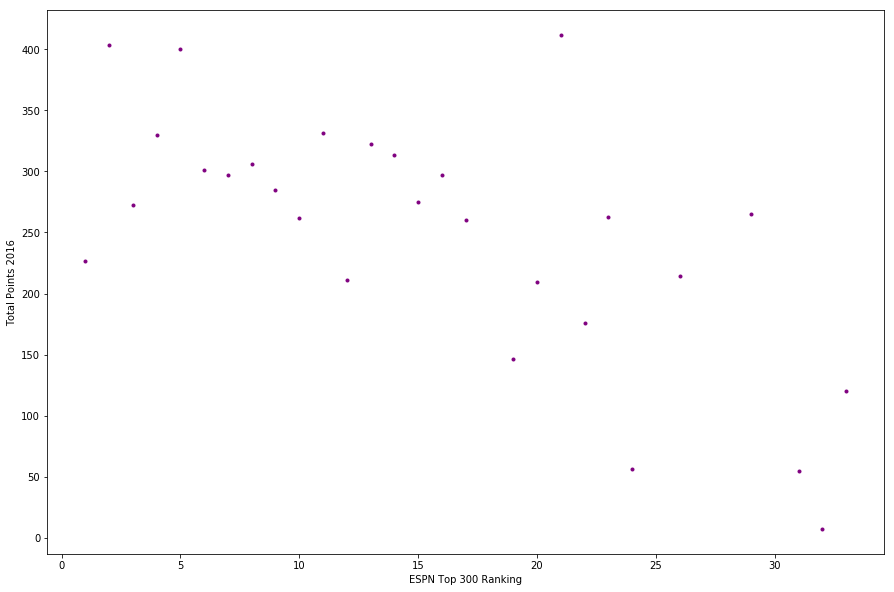

In [62]:
#Plot Actual points vs ranking
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

mpl.rcParams['figure.figsize'] = (15, 10)
pd.set_option('display.width', 6000)
pd.set_option('display.max_columns', 100)

plt.xlabel('ESPN Top 300 Ranking')
plt.ylabel('Total Points 2016')
plt.scatter(df_passer_summ['ESPN_Top300'], df_passer_summ['TotalPts_2016'], marker='.', color='purple');

In [63]:
df_passer_summ['TotalPts_2016'].rank(ascending=False)

C.Newton            19.0
A.Rodgers            2.0
R.Wilson            14.0
A.Luck               5.0
D.Brees              3.0
B.Roethlisberger     9.0
C.Palmer            10.0
T.Brady              8.0
E.Manning           12.0
B.Bortles           17.0
P.Rivers             4.0
T.Taylor            21.0
K.Cousins            6.0
D.Carr               7.0
M.Mariota           13.0
M.Stafford          11.0
A.Dalton            18.0
R.Fitzpatrick       24.0
R.Tannehill         22.0
M.Ryan               1.0
B.Osweiler          23.0
J.Flacco            16.0
J.Cutler            26.0
A.Smith             20.0
S.Bradford          15.0
B.Gabbert           27.0
T.Romo              28.0
C.Keenum            25.0
Name: TotalPts_2016, dtype: float64

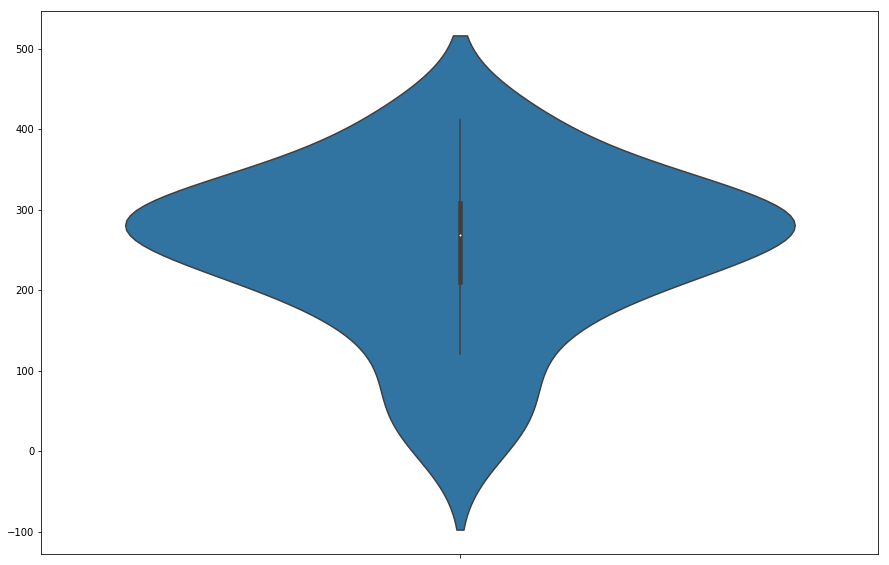

In [64]:
import seaborn as sns
sns.violinplot(y=['TotalPts_2016'], data=df_passer_summ);

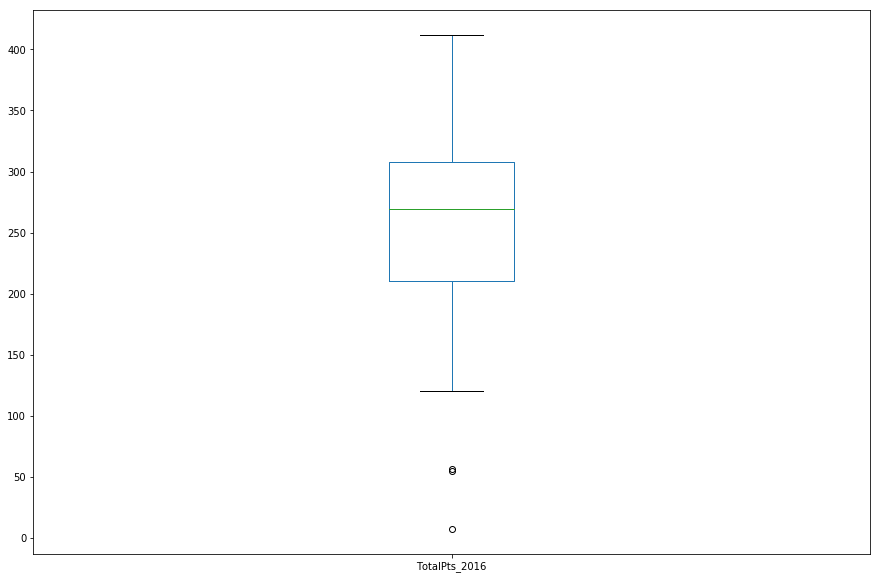

In [65]:
df_passer_summ[['TotalPts_2016']].plot(kind='box');


In [66]:
df_passer_summ[['TotalPts_2016']].describe()


,TotalPts_2016
count,28.000000
mean,250.685714
std,101.875330
min,7.160000
25%,210.640000
50%,268.920000
75%,307.990000
max,411.760000


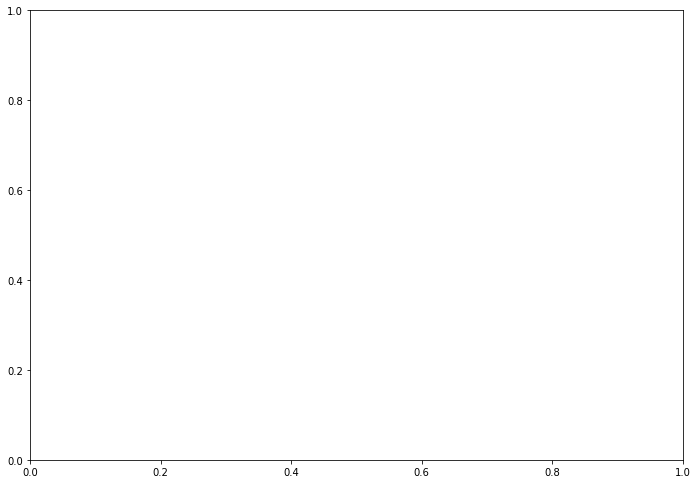

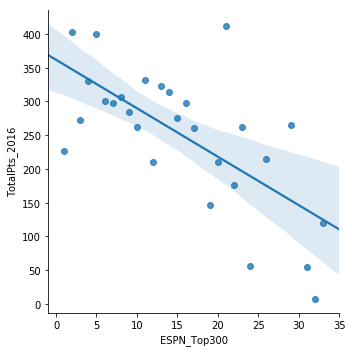

In [67]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lmplot(data=df_passer_summ,
           x='ESPN_Top300', y='TotalPts_2016'
           );

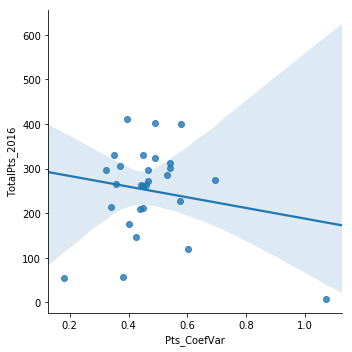

In [68]:
sns.lmplot(data=df_passer_summ,
           y='TotalPts_2016', x='Pts_CoefVar'
           );

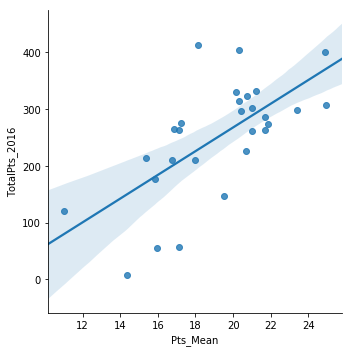

In [69]:
sns.lmplot(data=df_passer_summ,
           y='TotalPts_2016', x='Pts_Mean'
           );

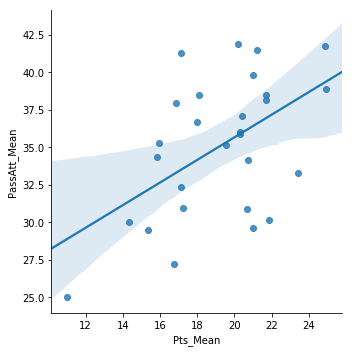

In [70]:
sns.lmplot(data=df_passer_summ,
           y='PassAtt_Mean', x='Pts_Mean'
           );


In [71]:
df_passer_summ.head()

,0,Pts_Mean,PassAtt_Mean,Pts_Std,Pts_CoefVar,ESPN_Top300,TotalPts_2016,Rank_2016
C.Newton,C.Newton,20.682500,30.875000,11.871413,0.573983,1,226.36,19.0
A.Rodgers,A.Rodgers,20.292500,36.000000,9.959188,0.490782,2,403.12,2.0
R.Wilson,R.Wilson,21.850000,30.125000,10.173068,0.465587,3,272.76,14.0
A.Luck,A.Luck,20.177143,41.857143,7.046696,0.349242,4,329.60,5.0
D.Brees,D.Brees,24.888000,41.733333,14.349684,0.576570,5,400.32,3.0


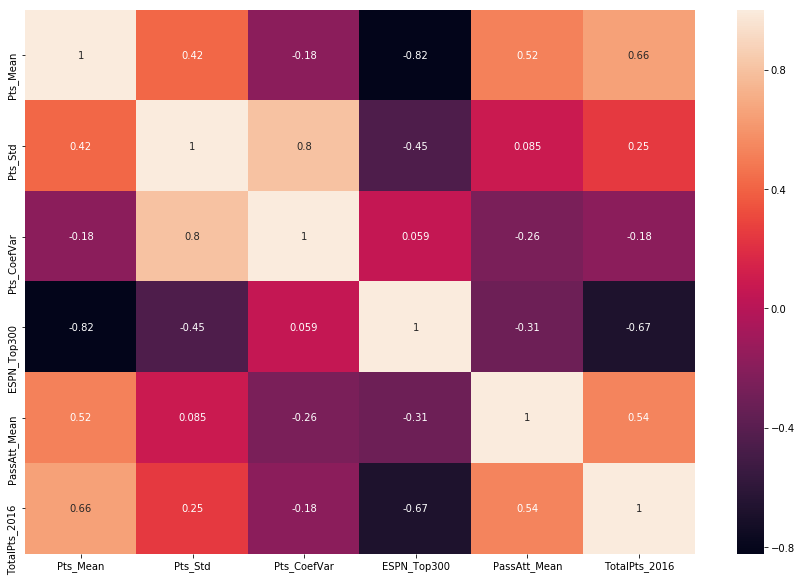

In [72]:
corr_matrix_cols= ['Pts_Mean', 'Pts_Std', 'Pts_CoefVar', 'ESPN_Top300', 'PassAtt_Mean', 'TotalPts_2016']
sns.heatmap(df_passer_summ[corr_matrix_cols].corr(), annot=True)

In [73]:
import statsmodels.formula.api as smf

In [74]:
x= df_passer_summ[['ESPN_Top300']]
y= df_passer_summ[['TotalPts_2016']]

linear_model = smf.ols(formula='TotalPts_2016 ~ ESPN_Top300', data=df_passer_summ).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          TotalPts_2016   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     21.68
Date:                Wed, 04 Oct 2017   Prob (F-statistic):           8.33e-05
Time:                        18:27:00   Log-Likelihood:                -160.20
No. Observations:                  28   AIC:                             324.4
Df Residuals:                      26   BIC:                             327.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     361.7347     27.905     12.963      0.000     304.376     419.094
ESPN_Top300    -7.1810      1.542     -4.656      0.000     -10.351      -4.011
==============================================================================
Omnibus:                        1.394   Durbin-Watson:                   2.306
Prob(Omnibus):                  0.498   Jarque-Bera (JB):                0.478
Skew:                           0.254   Prob(JB):                        0.788
Kurtosis:                       3.389   Cond. No.                         34.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
## THIS IS THE BEST MODEL
linear_model = smf.ols(formula='TotalPts_2016 ~ ESPN_Top300 + PassAtt_Mean', data=df_passer_summ).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          TotalPts_2016   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     16.79
Date:                Wed, 04 Oct 2017   Prob (F-statistic):           2.39e-05
Time:                        18:27:01   Log-Likelihood:                -156.77
No. Observations:                  28   AIC:                             319.5
Df Residuals:                      25   BIC:                             323.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       63.5422    115.951      0.548      0.589    -175.263     302.348
ESPN_Top300     -5.9787      1.464     -4.083      0.000      -8.995      -2.963
PassAtt_Mean     7.9765      3.028      2.635      0.014       1.741      14.212
==============================================================================
Omnibus:                        0.243   Durbin-Watson:                   2.202
Prob(Omnibus):                  0.885   Jarque-Bera (JB):                0.131
Skew:                           0.149   Prob(JB):                        0.936
Kurtosis:                       2.848   Cond. No.                         343.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
linear_model = smf.ols(formula='TotalPts_2016 ~ ESPN_Top300 + PassAtt_Mean + Pts_Mean', data=df_passer_summ).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          TotalPts_2016   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     10.75
Date:                Wed, 04 Oct 2017   Prob (F-statistic):           0.000114
Time:                        18:27:01   Log-Likelihood:                -156.76
No. Observations:                  28   AIC:                             321.5
Df Residuals:                      24   BIC:                             326.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       52.8723    180.131      0.294      0.772    -318.901     424.645
ESPN_Top300     -5.8146      2.568     -2.264      0.033     -11.115      -0.514
PassAtt_Mean     7.8404      3.542      2.214      0.037       0.530      15.151
Pts_Mean         0.6720      8.554      0.079      0.938     -16.982      18.326
==============================================================================
Omnibus:                        0.263   Durbin-Watson:                   2.198
Prob(Omnibus):                  0.877   Jarque-Bera (JB):                0.124
Skew:                           0.149   Prob(JB):                        0.940
Kurtosis:                       2.868   Cond. No.                         582.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
linear_model = smf.ols(formula='TotalPts_2016 ~ PassAtt_Mean + Pts_Mean', data=df_passer_summ).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          TotalPts_2016   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     11.64
Date:                Wed, 04 Oct 2017   Prob (F-statistic):           0.000267
Time:                        18:27:02   Log-Likelihood:                -159.47
No. Observations:                  28   AIC:                             324.9
Df Residuals:                      25   BIC:                             328.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -272.1262    117.463     -2.317      0.029    -514.045     -30.207
PassAtt_Mean     5.9196      3.712      1.595      0.123      -1.725      13.564
Pts_Mean        16.4227      5.372      3.057      0.005       5.358      27.487
==============================================================================
Omnibus:                        0.856   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.652   Jarque-Bera (JB):                0.305
Skew:                          -0.249   Prob(JB):                        0.858
Kurtosis:                       3.116   Cond. No.                         329.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""